# MK Spectra Types

Figure 1.8 from Chapter 1 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press. 

Plot of optical spectra of representative stellar dwarf spectral types.

All of these are dwarf stars, types O5 thru M5, from *A Library of Stellar Spectra* by Jacoby, Hunter, & 
Christian [1984, ApJ, 56, 257](http://adsabs.harvard.edu/abs/1984ApJS...56..257J).  Data have been rescaled 
to have unity flux at 5500A and then were shifted by an arbitrary constant so that they will appear in a 
vertical stack without overlaps.

In [8]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [9]:
plotFile = 'Fig1_8.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Data Files

The file named `mkData.txt` in the `MKTypes/` subfolder is a list of the spectrum files and their associated
spectral type. All are luminosity class V (dwarfs), but we don't note this in the plot below 
(easy enough to restore if needed).

In [10]:
dataFile = 'MKTypes/mkData.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
fileNames = np.array(data['filename'])
spTypes = np.array(data['SpType'])

lMin = 3150.0
lMax = 7550.0
fMin = -0.95
fMax = 20.95

## Fig 1.8 - MK Spectral Types

Plot the spectral stack from O5 through M5, labeling the spectral type at the left of the plot.  Axes are linear, with wavelength in Angstroms and fluxes are normalized $f_\lambda$.

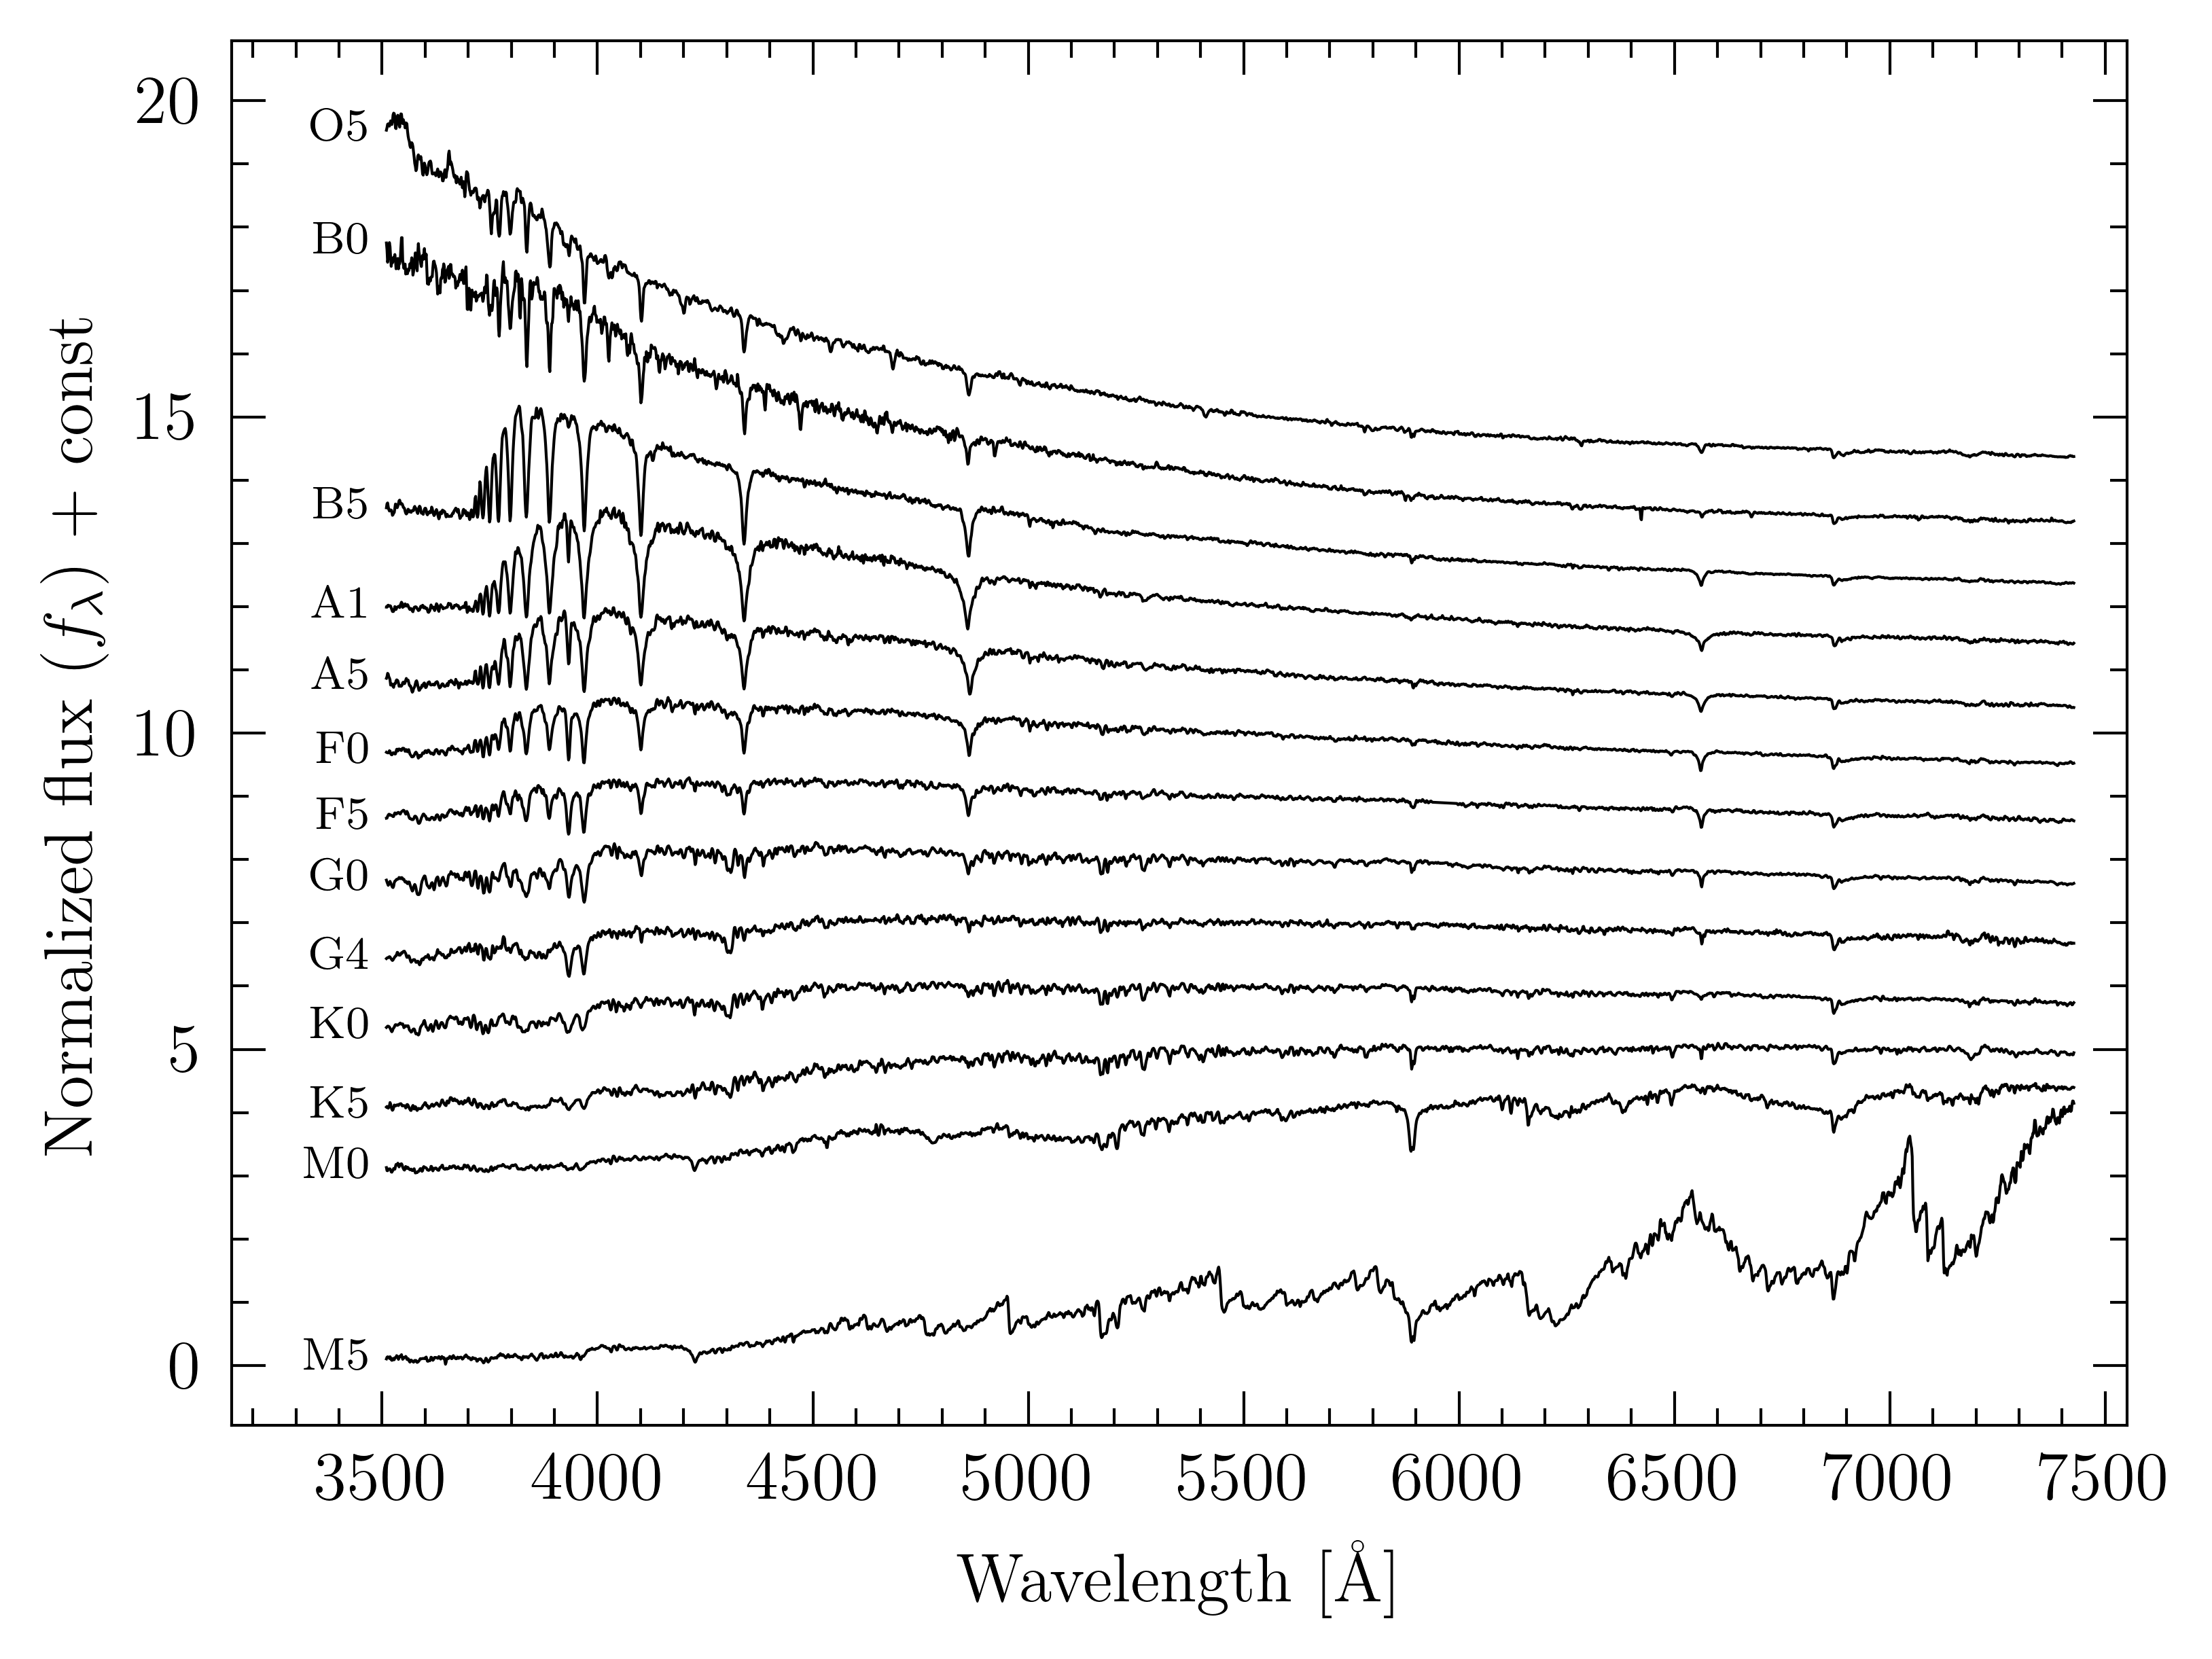

In [11]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(lMin,lMax)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'Wavelength [\AA]',fontsize=axisFontSize)

ax.set_ylim(fMin,fMax)
ax.yaxis.set_major_locator(MultipleLocator(5.0))
ax.yaxis.set_minor_locator(MultipleLocator(1.0))
ax.set_ylabel(r'Normalized flux ($f_\lambda$) + const',fontsize=axisFontSize)

for i, file in enumerate(fileNames):
    specFile = f'MKTypes/{file}'
    specData = pd.read_csv(specFile,sep=r'\s+',comment='#')
    lam = np.array(specData['Wave'])
    flam = np.array(specData['Flux'])
    ax.plot(lam,flam,'-',color='black',lw=0.5)
    ax.text(lam[0]-35.,flam[0],spTypes[i],va='center',ha='right',fontsize=labelFontSize)

ax.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')